In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import maptplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'maptplotlib'

ModuleNotFoundError: No module named 'maptplotlib'

Importing necassary Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

Reading dataset

In [27]:
df = pd.read_excel("/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


**Preprocessing & Cleaning**

In [28]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [29]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


This data is clean from NaN values, Nulls and duplicates

In [32]:
# describing the numerical data
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [33]:
# describing the categorical data
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [34]:
# add new column year
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()


In [35]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday


In [36]:
# We can drop some columns we don't use in analysis
df.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

**Analysis & Visualization**

In [37]:
df['year'].unique()

array([2023], dtype=int32)

In [38]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [49]:
#TRANSACTIONS by month

transactions_per_month = df['month'].value_counts()
sort_transactions = transactions_per_month.sort_index(level='month')
print(sort_transactions )


month
January     17314
February    16359
March       21229
April       25335
May         33527
June        35352
Name: count, dtype: int64


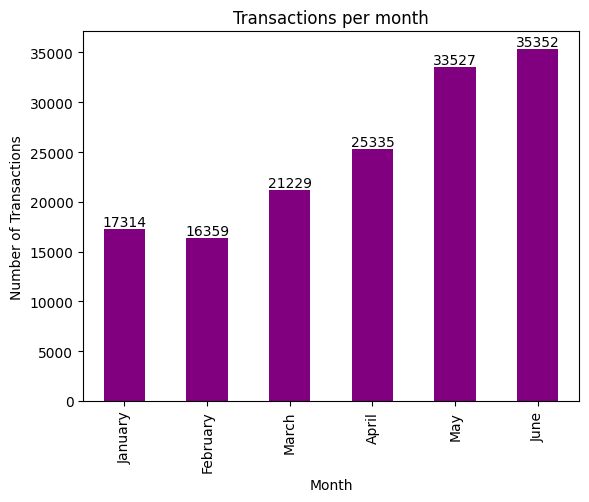

In [50]:
ax= sort_transactions.plot(kind="bar",xlabel='Month', ylabel= 'Number of Transactions', title= "Transactions per month",color= 'purple')
for i, value in enumerate(sort_transactions):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

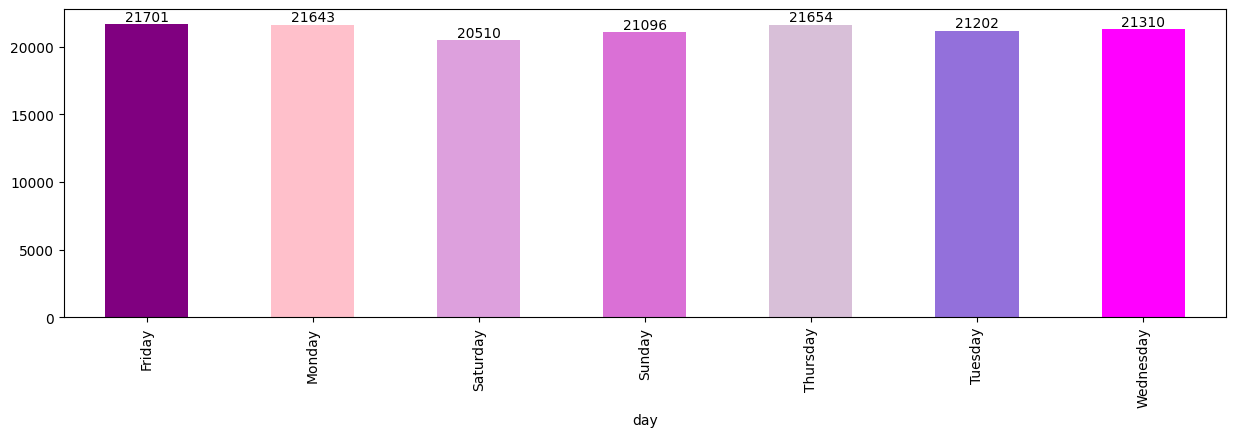

In [51]:
#Transaction by day
transaction_by_day = df.groupby("day")["day"].size()

fig,ax= plt.subplots(figsize=(15,4))
# Define colors for each bar
colors = ['purple', 'pink', 'plum', 'orchid', 'thistle', 'mediumpurple', 'magenta']
transaction_by_day.plot(kind= "bar", color=colors, ax=ax)
# Add text labels on top of each bar
for i, value in enumerate(transaction_by_day):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()


In [53]:
#TRANSACTIONS PER HOUR

df["hour"] = df["transaction_time"].apply(lambda x : x.hour)
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,7
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,7
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday,7
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,7


In [54]:
transactions_per_hour= df.groupby("hour")["hour"].value_counts()
print(transactions_per_hour)

hour
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
Name: count, dtype: int64


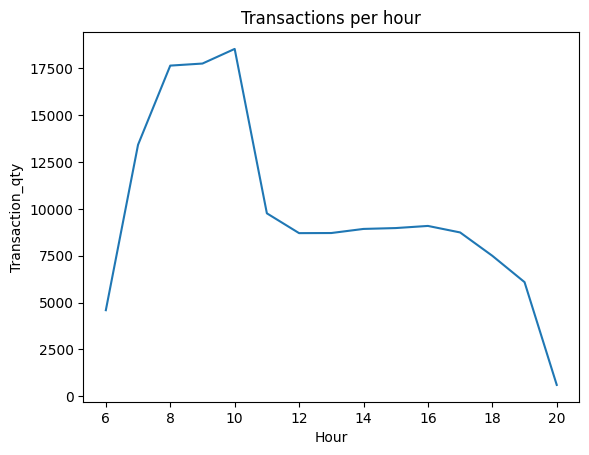

In [55]:
transactions_per_hour.plot(xlabel="Hour",ylabel="Transaction_qty",title="Transactions per hour")

plt.show()

In [56]:
#REVENUE 
df["revenue"] = df["transaction_qty"] * df["unit_price"]
print(df["revenue"])

0         6.00
1         6.20
2         9.00
3         2.00
4         6.20
          ... 
149111    5.00
149112    6.00
149113    3.00
149114    3.75
149115    1.60
Name: revenue, Length: 149116, dtype: float64


In [57]:
#Revenue by store
revenue_by_location= df.groupby("store_location")["revenue"].sum().sort_values(ascending=False)
print(revenue_by_location)

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: revenue, dtype: float64


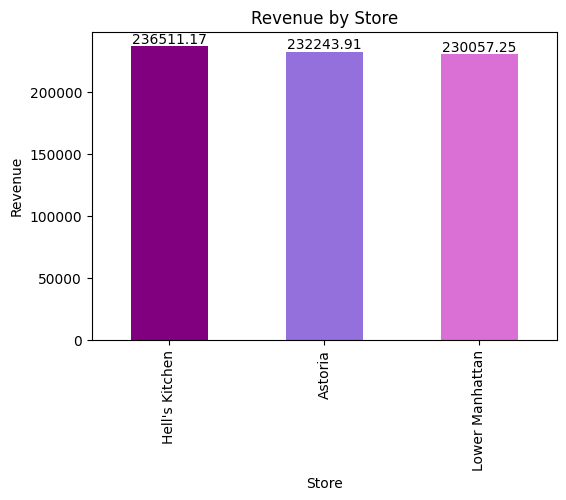

In [73]:
#Plot revenue by store

fig, ax = plt.subplots(figsize=(6, 4))

revenue_by_location.plot(kind="bar", xlabel="Store", ylabel="Revenue", title="Revenue by Store", color=['purple', 'mediumpurple', 'orchid'], ax=ax)

# Adding text labels on the bars
for i, value in enumerate(revenue_by_location):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

Notes:

The total revenue generated from sales at each store location amounted to 232,243.91 for Astoria, 236,511.17 for Hell's Kitchen, and $230,057.25 for Lower Manhattan.
"Hell's Kitchen" appears to be the best store in terms of revenue.

In [59]:
#revenue by month
revenue_by_month = df.groupby("month")["revenue"].sum()
revenue_by_month_sorted= revenue_by_month.sort_index(level= "month", ascending= True)
print(revenue_by_month_sorted)

month
January      81677.74
February     76145.19
March        98834.68
April       118941.08
May         156727.76
June        166485.88
Name: revenue, dtype: float64


/tmp/ipykernel_33/4103404930.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_month = df.groupby("month")["revenue"].sum()


<Axes: title={'center': 'Revenue by month'}, xlabel=' Month', ylabel='Revenue'>

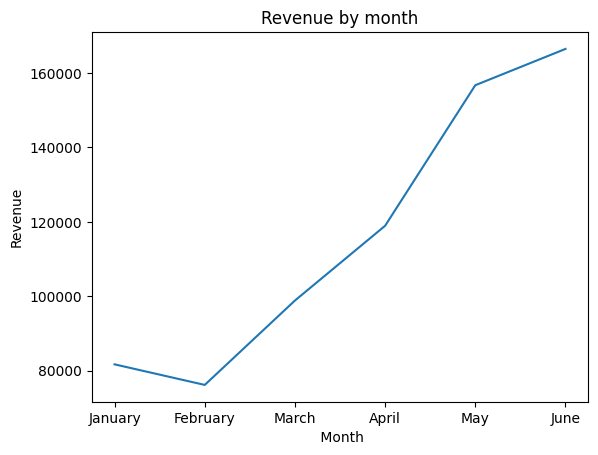

In [60]:
revenue_by_month.plot(kind="line", title= "Revenue by month", xlabel=" Month", ylabel="Revenue")

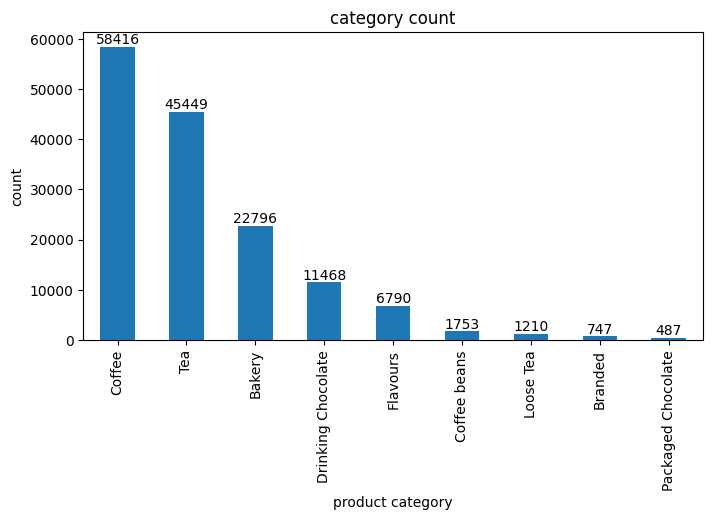

In [61]:
# Category count
category_count = df['product_category'].value_counts()
category_count


fig,ax= plt.subplots(figsize = (8, 4))
category_count.plot(kind= "bar", xlabel= "product category", ylabel = "count", title= "category count", ax=ax)

for i, value in enumerate(category_count):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

We can see that Coffee stands as the best selling product. Also, Tea exhibits a high sales rates

In [62]:
#Product count withing each category
#The reset_index(name='count') converts the resulting Series into a DataFrame with the count as a new column.
product_count= df.groupby(['product_category', 'product_type']).size().reset_index(name="count")
print(product_count)

      product_category           product_type  count
0               Bakery               Biscotti   5711
1               Bakery                 Pastry   6912
2               Bakery                  Scone  10173
3              Branded               Clothing    221
4              Branded             Housewares    526
5               Coffee       Barista Espresso  16403
6               Coffee            Drip coffee   8477
7               Coffee  Gourmet brewed coffee  16912
8               Coffee  Organic brewed coffee   8489
9               Coffee  Premium brewed coffee   8135
10        Coffee beans         Espresso Beans    319
11        Coffee beans          Gourmet Beans    366
12        Coffee beans            Green beans    134
13        Coffee beans      House blend Beans    183
14        Coffee beans          Organic Beans    415
15        Coffee beans          Premium Beans    336
16  Drinking Chocolate          Hot chocolate  11468
17            Flavours          Regular syrup 

In [63]:
categories = product_count['product_category'].unique()
print(categories)

['Bakery' 'Branded' 'Coffee' 'Coffee beans' 'Drinking Chocolate'
 'Flavours' 'Loose Tea' 'Packaged Chocolate' 'Tea']


In [64]:
df["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

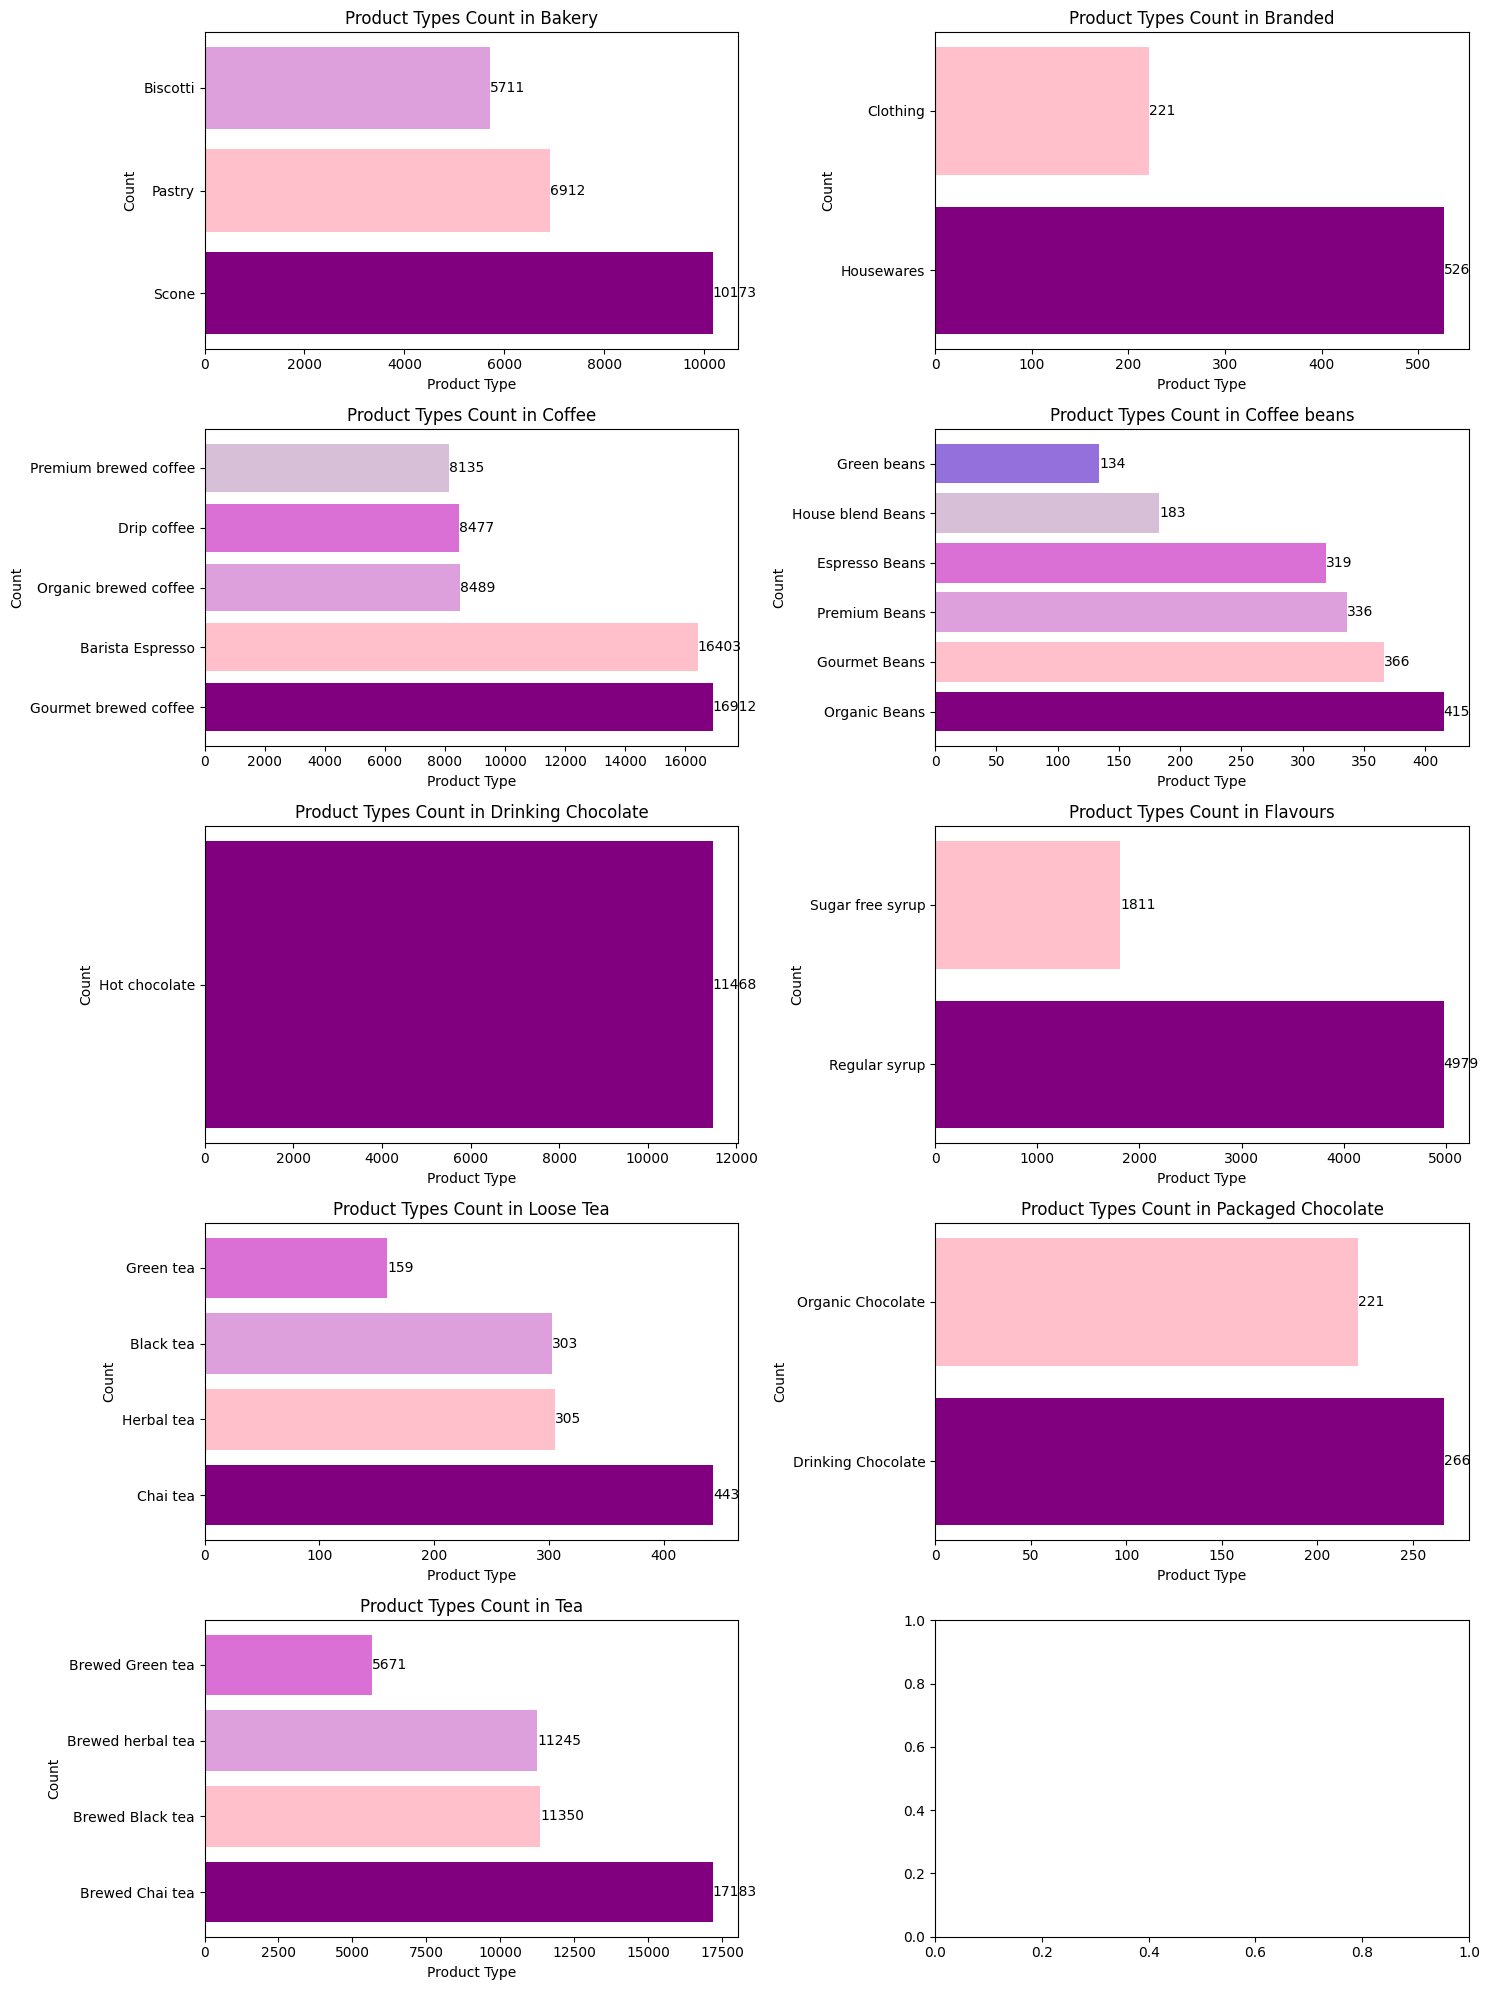

In [65]:
#create subplots
fig,ax= plt.subplots(5,2, figsize= (15,20))
#flattens the 2D array of axes into a 1D array for easy indexing
ax = ax.flatten()
# Plot data in each subplot
for i, category in enumerate(categories):
    subset = product_count[product_count['product_category'] == category].sort_values(by='count', ascending=False)
    ax[i].barh(subset['product_type'], subset['count'], color = colors)
    ax[i].set_title(f'Product Types Count in {category}')
    ax[i].set_xlabel('Product Type')
    ax[i].set_ylabel('Count')
    
    for j, (index, row) in enumerate(subset.iterrows()):
        ax[i].text(row['count'], j, str(row['count']), ha='left', va='center')

plt.tight_layout()
plt.show()

             product_type   revenue
0        Barista Espresso  91406.20
1         Brewed Chai tea  77081.95
2           Hot chocolate  72416.00
3   Gourmet brewed coffee  70034.60
4        Brewed Black tea  47932.00
5       Brewed herbal tea  47539.50
6   Premium brewed coffee  38781.15
7   Organic brewed coffee  37746.50
8                   Scone  36866.12
9             Drip coffee  31984.00
10                 Pastry  25655.99
11       Brewed Green tea  23852.50
12               Biscotti  19793.53
13          Premium Beans  14583.50
14          Organic Beans   8509.50
15             Housewares   7444.00
16          Gourmet Beans   6798.00
17               Clothing   6163.00
18          Regular syrup   6084.80
19         Espresso Beans   5560.25
20               Chai tea   4301.25
21      House blend Beans   3294.00
22             Herbal tea   2729.75
23     Drinking Chocolate   2728.04
24              Black tea   2711.85
25       Sugar free syrup   2324.00
26      Organic Chocolate   

<Axes: xlabel='product type', ylabel='revenue'>

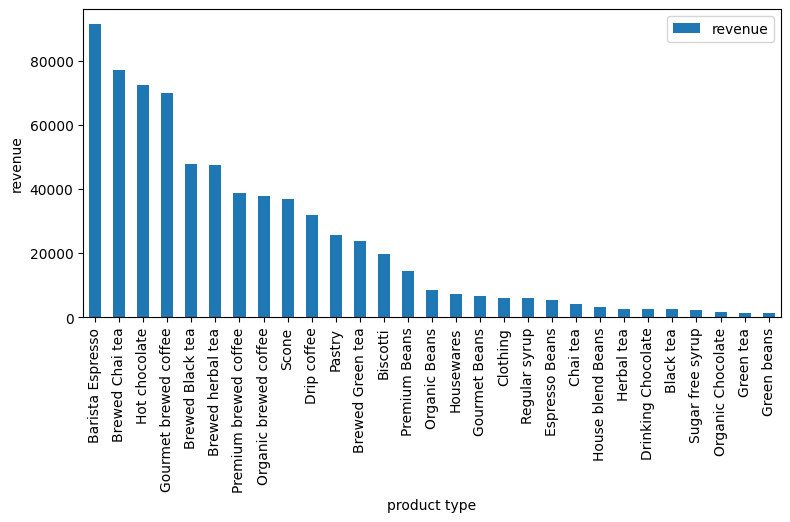

In [66]:
# Product type with the highest revenue
category_revenue = df.groupby("product_type")["revenue"].sum().reset_index()

category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)
category_revenue.reset_index(drop= True, inplace= True)
print(category_revenue)

category_revenue.set_index('product_type').plot(kind= 'bar', xlabel= 'product type', ylabel = 'revenue',  figsize=(9, 4))


In [67]:
# transaction_qty by store and category
product_by_store=df.groupby([ "product_category","store_location"])["transaction_qty"].sum().sort_values(ascending=False)

# Pivot the data so that product_category is the index and store_location are the columns
product_by_store_pivot = product_by_store.unstack()
# Add a column for the total transactions across all stores for sorting
product_by_store_pivot["total_transactions"]=product_by_store_pivot.sum(axis=1)
# Sort by the total transactions in descending order to get the most sold product on top
sorted_product_by_store_pivot = product_by_store_pivot.sort_values(by='total_transactions', ascending=False)

sorted_product_by_store_pivot = sorted_product_by_store_pivot.drop(columns=['total_transactions'])
print(sorted_product_by_store_pivot)



store_location      Astoria  Hell's Kitchen  Lower Manhattan
product_category                                            
Coffee                29655           30220            29375
Tea                   24048           22980            22709
Bakery                 7496            7678             8040
Drinking Chocolate     6351            5672             5434
Flavours               2206            3596             4709
Coffee beans            502             790              536
Loose Tea               344             485              381
Branded                 279             119              378
Packaged Chocolate      110             197              180


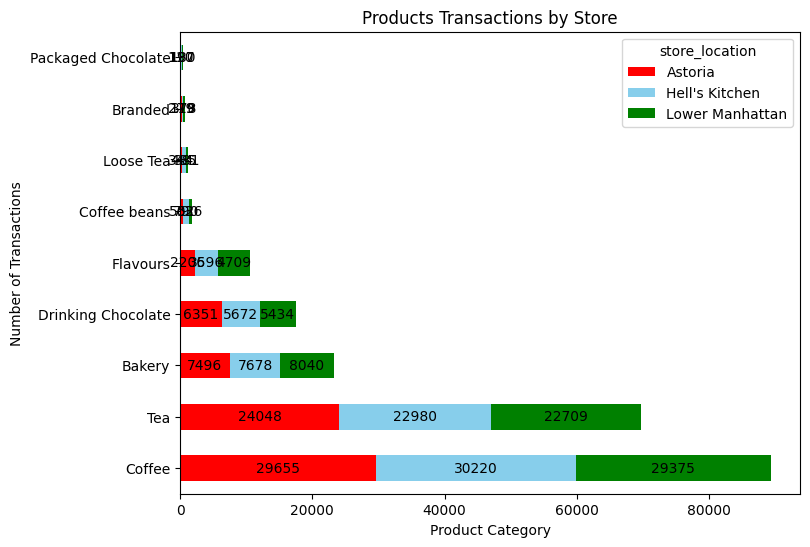

In [68]:
fig, ax = plt.subplots(figsize = (8, 6))
# create stacked bar chart
sorted_product_by_store_pivot.plot.barh( stacked= True, ax=ax, color=['red', 'skyblue', 'green'])

# Add Title and Labels
ax.set_title('Products Transactions by Store')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Transactions')
# add text labels to the center of each bar segment
for bar in ax.containers:
    ax.bar_label(bar, label_type='center')

Correlation matrix is : 
                 transaction_qty   revenue  unit_price
transaction_qty         1.000000  0.356231   -0.123546
revenue                 0.356231  1.000000    0.685550
unit_price             -0.123546  0.685550    1.000000


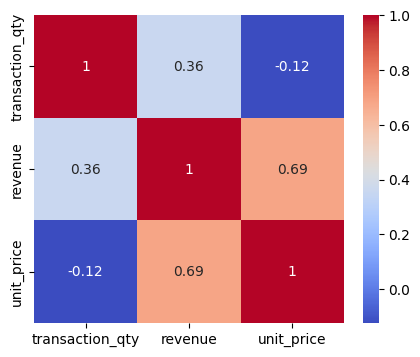

In [69]:
#correlation matrix
select_colums= df[["transaction_qty", "revenue" ,"unit_price"]]
matrix= select_colums.corr()
print("Correlation matrix is : ")
print(matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

Interpretation:

transaction_qty and revenue:

Correlation: 0.356231

Interpretation: There is a positive, but moderate correlation between the quantity of transactions and revenue.

transaction_qty and unit_price:

Correlation: -0.123546

Interpretation: There is a weak negative correlation between the quantity of transactions and the unit price. This suggests that as the number of transactions increases, the unit price tends to decrease slightly, but the relationship is weak.

revenue and unit_price:

Correlation: 0.685550
Interpretation: There is a strong positive correlation between revenue and unit price. This means that as the unit price increases, revenue also tends to increase. This strong relationship indicates that unit price has a significant impact on revenue.

Key Insights:

Revenue vs. Transaction Quantity: Although there is a positive relationship between the number of transactions and revenue, it is not as strong as the relationship between revenue and unit price.

Revenue vs. Unit Price: Unit price has a stronger impact on revenue compared to the number of transactions.

Transaction Quantity vs. Unit Price: The weak negative correlation suggests that increasing the number of transactions might be associated with slightly lower prices, but this relationship is not strong.

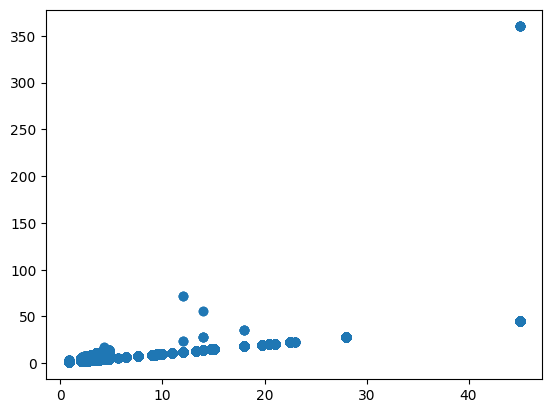

In [70]:

plt.scatter( y= df["revenue"], x= df["unit_price"])
plt.show()

<Axes: xlabel='transaction_qty', ylabel='revenue'>

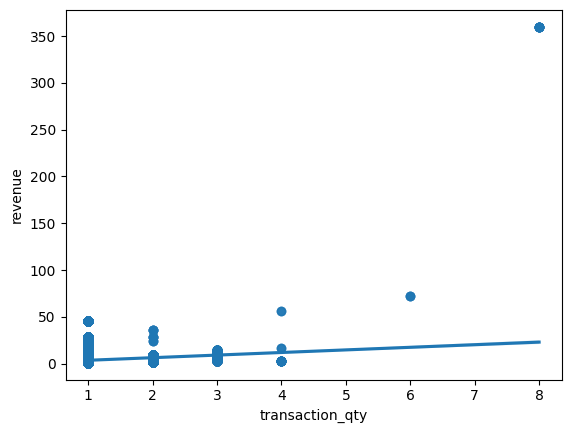

In [71]:
sns.regplot(x="transaction_qty", y= "revenue" ,data =df)

Observation

The dataset contains no null values or duplicates. The lowest number of transactions occurs in January, gradually increasing through June, which sees the highest number of transactions at 35,352 across all stores.

Considering the number of transactions, the days with the highest order density are as follows:

Friday ranks highest in total transactions.
Thursday ranks second.
Monday ranks third.
The peak transaction times are between 8 a.m. and 11 a.m.

The total revenue generated from sales at each store location amounted to 232,243.91 for Astoria, 236,511.17 for Hell's Kitchen, and $230,057.25 for Lower Manhattan. "Hell's Kitchen" appears to be the best store in terms of revenue.

The best-selling products are coffee and tea, which have the highest number of transactions. 
Breaking it down by product type:

In the Bakery category, the most sold item is the scone.
In the Branded category, the best-selling item is Housewares.
In the Coffee category, the best-selling item is Gourmet brewed coffee.
In the Coffee Beans category, the best-selling item is Organic Beans.
The Drinking Chocolate category solely offers hot chocolate.
Regular syrup is the top-selling item in the Flavours category.
In the Loose Tea category, the best-selling item is Chai tea.
In the Packaged Chocolate category, the best-selling item is Drinking Chocolate.
In the Tea category, the best-selling item is Brewed Chai tea.

The top 5 products with the highest income come from the categories of Drinking Chocolate, Coffee, and Tea.


Top Revenue Product Types :


Barista Espresso with a revenue of 91,406.20

Brewed Chai tea with a revenue of 77,081.95

Hot chocolate with a revenue of 72,416.00

Gourmet brewed coffee with a revenue of 70,034.60

Brewed Black tea with a revenue of 47,932.00


Lowest Revenue Product Types :

Organic Chocolate with a revenue of 1,679.60

Green tea with a revenue of 1,470.75

Green beans with a revenue of 1,340.00